In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [33]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
input_size=784
Units=1024
classes=10
batch_size = 100

In [0]:
intr = tf.keras.initializers.glorot_normal()

In [0]:
tf.reset_default_graph() 

In [0]:
x = tf.placeholder(tf.float32, [None, input_size])
y = tf.placeholder(tf.float32,[None,classes])


Defining network ans calcculating the svd matrices

In [0]:
#first layer
Layer_W_1	= tf.get_variable("Hidden_W1", shape=[input_size, Units],	initializer=intr)
b_1	= tf.get_variable("Hidden_b1", shape=[Units],	initializer=intr)
layer_1	= tf.nn.relu(tf.matmul(x, Layer_W_1) + b_1) 
#second layer
Layer_W_2	= tf.get_variable("Hidden_W2", shape=[Units, Units], initializer=intr)
b_2	= tf.get_variable("Hidden_b2", shape=[Units],	initializer=intr)
layer_2 = tf.nn.relu(tf.matmul(layer_1, Layer_W_2) + b_2)
#third layer
Layer_W_3	= tf.get_variable("Hidden_W3", shape=[Units, Units], initializer=intr)
b_3	= tf.get_variable("Hidden_b3", shape=[Units],	initializer=intr)
layer_3	= tf.nn.relu(tf.matmul(layer_2,Layer_W_3 ) + b_3)
#fourth layer
Layer_W_4	= tf.get_variable("Hidden_W4", shape=[Units, Units], initializer=intr)
b_4	= tf.get_variable("Hidden_b4", shape=[Units],	initializer=intr)
layer_4	= tf.nn.relu(tf.matmul(layer_3,	Layer_W_4) + b_4)
#fifth layer
Layer_W_5	= tf.get_variable("Hidden_W5", shape=[Units, Units], initializer=intr)
b_5	= tf.get_variable("Hidden_b5", shape=[Units],	initializer=intr)
layer_5	= tf.nn.relu(tf.matmul(layer_4,	Layer_W_5) + b_5)
#output layer
Layer_W_output	= tf.get_variable("Output_W", shape=[Units, classes],	initializer=intr)
b_6	= tf.get_variable("Output_b", shape=[classes], initializer=intr)
output = tf.matmul(layer_5,	Layer_W_output) + b_6


In [39]:
prediction = output
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
optimizer = tf.train.AdamOptimizer().minimize(loss)
hm_epochs = 10
sess = tf.Session()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())
for epoch in range(hm_epochs):
    epoch_loss = 0
    for _ in range(int(mnist.train.num_examples/batch_size)):
        epoch_x, epoch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, loss], feed_dict={x: epoch_x, y: epoch_y})
        epoch_loss += c

    print('Epoch', epoch, 'finished of total',hm_epochs,'with loss:',epoch_loss)

correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

accuracy = 100*tf.reduce_mean(tf.cast(correct, 'float'))
print('Test Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels},session=sess))

Epoch 0 finished of total 10 with loss: 127.10541081242263
Epoch 1 finished of total 10 with loss: 59.67068273574114
Epoch 2 finished of total 10 with loss: 43.32818106748164
Epoch 3 finished of total 10 with loss: 32.90038435626775
Epoch 4 finished of total 10 with loss: 28.225353985500988
Epoch 5 finished of total 10 with loss: 24.924043556384277
Epoch 6 finished of total 10 with loss: 20.276265356107615
Epoch 7 finished of total 10 with loss: 19.79032656858908
Epoch 8 finished of total 10 with loss: 19.20696803089777
Epoch 9 finished of total 10 with loss: 15.636816919079138
Test Accuracy: 98.03


using svd of the networks weight matrices as weight inputs for different d values

In [0]:
s1,u1,v1=tf.svd(Layer_W_1)

s2,u2,v2=tf.svd(Layer_W_2)

s3,u3,v3=tf.svd(Layer_W_3)

s4,u4,v4=tf.svd(Layer_W_4)

s5,u5,v5=tf.svd(Layer_W_5)

s6,u6,v6=tf.svd(Layer_W_output)

d = tf.placeholder(tf.int64, shape = (), name = "d_value")
svd_layer_1 = tf.add(tf.matmul(tf.multiply(tf.matmul(x, u1[:,:d]), s1[:d]), tf.transpose(v1)[:d,:]), b_1)
svd_layer_1 = tf.nn.relu(svd_layer_1)
svd_layer_2 = tf.add(tf.matmul(tf.multiply(tf.matmul(svd_layer_1, u2[:,:d]), s2[:d]), tf.transpose(v2)[:d,:]), b_2)
svd_layer_2 = tf.nn.relu(svd_layer_2)
svd_layer_3 = tf.add(tf.matmul(tf.multiply(tf.matmul(svd_layer_2, u3[:,:d]), s3[:d]), tf.transpose(v3)[:d,:]), b_3)
svd_layer_3 = tf.nn.relu(svd_layer_3)
svd_layer_4 = tf.add(tf.matmul(tf.multiply(tf.matmul(svd_layer_3, u4[:,:d]), s4[:d]), tf.transpose(v4)[:d,:]), b_4)
svd_layer_4 = tf.nn.relu(svd_layer_4)
svd_layer_5 = tf.add(tf.matmul(tf.multiply(tf.matmul(svd_layer_4, u5[:,:d]), s5[:d]), tf.transpose(v5)[:d,:]), b_5)
svd_layer_5 = tf.nn.relu(svd_layer_5)
svd_output_layer1=tf.add(tf.matmul(tf.multiply(tf.matmul(svd_layer_5, u6[:,:d]), s6[:d]), tf.transpose(v6)[:d,:]),b_6) 
#print(svd_output_layer1)

In [41]:
svd_prediction = svd_output_layer1
svd_correct_preds = tf.equal(tf.argmax(svd_prediction, 1), tf.argmax(y, 1))
svd_accuracy = tf.reduce_mean(tf.cast(svd_correct_preds, 'float'))
d_values = [10, 20, 50, 100, 200, 786]
accuracies=[]
for i in range(len(d_values)):
    curr_accuracy = sess.run(svd_accuracy, feed_dict = {d: d_values[i], x:mnist.test.images, y:mnist.test.labels})
    accuracies.append(curr_accuracy)
    print('accuracy for d=',d_values[i],'is',100*accuracies[i])

accuracy for d= 10 is 66.40999913215637
accuracy for d= 20 is 93.76999735832214
accuracy for d= 50 is 97.65999913215637
accuracy for d= 100 is 98.00000190734863
accuracy for d= 200 is 98.03000092506409
accuracy for d= 786 is 98.0400025844574


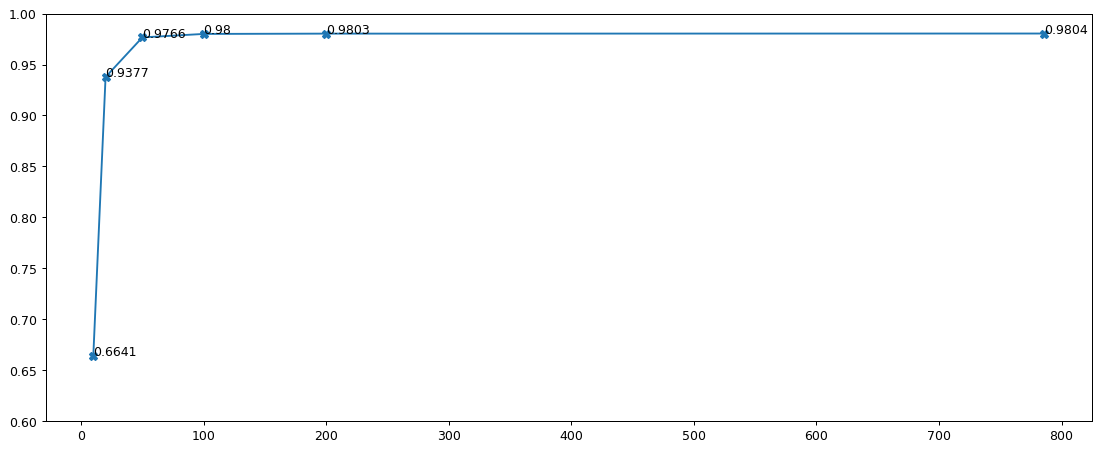

In [42]:
from matplotlib import pyplot
fig = pyplot.figure(figsize=(15, 6),dpi=90)
ax = fig.add_subplot(111)
ax.set_ylim(0.6,1)

pyplot.plot(d_values, accuracies,marker='X')
for k,j in zip(d_values, accuracies):
    ax.annotate(str(j),xy=(k,j))

pyplot.show()

The accuracy is better for around 120 d value

Taking d value =20 and giving matrix input in shape of u*v

In [0]:
d1=20

In [0]:
U_1	= tf.get_variable("LAYER1_U", shape=[input_size,d1 ],	initializer=intr)
V_1	= tf.get_variable("LAYER1_V", shape=[Units,d1 ],	initializer=intr)
B_1 = tf.get_variable("LAYER1_b", shape=[Units],	initializer=intr)

U_2	= tf.get_variable("LAYER2_U", shape=[Units,d1 ],	initializer=intr)
V_2	= tf.get_variable("LAYER2_V", shape=[Units,d1 ],	initializer=intr)
B_2 = tf.get_variable("LAYER2_b", shape=[Units],	initializer=intr)

U_3	= tf.get_variable("LAYER3_U", shape=[Units,d1 ],	initializer=intr)
V_3	= tf.get_variable("LAYER3_V", shape=[Units,d1 ],	initializer=intr)
B_3 = tf.get_variable("LAYER3_b", shape=[Units],	initializer=intr)

U_4	= tf.get_variable("LAYER4_U", shape=[Units,d1 ],	initializer=intr)
V_4	= tf.get_variable("LAYER4_V", shape=[Units,d1 ],	initializer=intr)
B_4 = tf.get_variable("LAYER4_b", shape=[Units],	initializer=intr)

U_5	= tf.get_variable("LAYER5_U", shape=[Units,d1 ],	initializer=intr)
V_5	= tf.get_variable("LAYER5_V", shape=[Units,d1 ],	initializer=intr)
B_5 = tf.get_variable("LAYER5_b", shape=[Units],	initializer=intr)

U_5	= tf.get_variable("LAYER6_U", shape=[Units,d1 ],	initializer=intr)
V_5	= tf.get_variable("LAYER6_V", shape=[classes,d1 ],	initializer=intr)
B_6	= tf.get_variable("Output_B", shape=[classes], initializer=intr)

In [0]:
Layer_W1	= tf.get_variable("Hidden_W_1", shape=[input_size, Units],	initializer=intr)

layer_d1	= tf.nn.relu(tf.matmul(x,tf.matmul(U_1,tf.transpose(V_1)) ) + B_1) 
#second layer
Layer_W2	= tf.get_variable("Hidden_W_2", shape=[Units, Units], initializer=intr)

layer_d2 = tf.nn.relu(tf.matmul(layer_d1, Layer_W2) + B_2)
#third layer
Layer_W3	= tf.get_variable("Hidden_W_3", shape=[Units, Units], initializer=intr)

layer_d3	= tf.nn.relu(tf.matmul(layer_d2,Layer_W3 ) + B_3)
#fourth layer
Layer_W4	= tf.get_variable("Hidden_W_4", shape=[Units, Units], initializer=intr)

layer_d4	= tf.nn.relu(tf.matmul(layer_d3,	Layer_W4) + B_4)
#fifth layer
Layer_W5	= tf.get_variable("Hidden_W_5", shape=[Units, Units], initializer=intr)

layer_d5	= tf.nn.relu(tf.matmul(layer_d4,	Layer_W5) + B_5)
#output layer
Layer_Woutput	= tf.get_variable("Output_Wd", shape=[Units, classes],	initializer=intr)

output_d = tf.matmul(layer_d5,	Layer_Woutput) + B_6

In [46]:
prediction = output_d
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
optimizer = tf.train.AdamOptimizer().minimize(loss)
hm_epochs = 10
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(hm_epochs):
    epoch_loss = 0
    for _ in range(int(mnist.train.num_examples/batch_size)):
        epoch_x, epoch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, loss], feed_dict={x: epoch_x, y: epoch_y})
        epoch_loss += c

    print('Epoch', epoch, 'finished of total',hm_epochs,'with loss:',epoch_loss)

correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

accuracy = 100*tf.reduce_mean(tf.cast(correct, 'float'))
print('Test Accuracy for d=20 and w in terms of u*v:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels},session=sess))

Epoch 0 finished of total 10 with loss: 189.16652872413397
Epoch 1 finished of total 10 with loss: 88.89420272223651
Epoch 2 finished of total 10 with loss: 65.86485583800822
Epoch 3 finished of total 10 with loss: 53.423423036932945
Epoch 4 finished of total 10 with loss: 46.31957265827805
Epoch 5 finished of total 10 with loss: 40.82285574357957
Epoch 6 finished of total 10 with loss: 34.85214984463528
Epoch 7 finished of total 10 with loss: 29.4243528911029
Epoch 8 finished of total 10 with loss: 26.195815558719914
Epoch 9 finished of total 10 with loss: 26.667057006503455
Test Accuracy for d=20 and w in terms of u*v: 96.92
